In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


IMPORT DATSET

In [2]:
df=pd.read_csv(r"C:\Users\KABI\Documents\MACHINE_LEARN_DS_PROJECTS\Bengaluru_House_Data.csv",encoding='latin-1')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00


EDA PROCESS

In [4]:
df.shape

(13320, 9)

In [5]:
rows,cols = df.shape
print(f' no_of rows: {rows} and no_of cols: {cols}')

 no_of rows: 13320 and no_of cols: 9


In [6]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  object 
dtypes: float64(2), object(7)
memory usage: 936.7+ KB


In [8]:
num_cols = df.select_dtypes(include=['int','float']).columns
obj_cols = df.select_dtypes(include='O').columns
print(len(num_cols))
print(len(obj_cols))

2
7


In [9]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

<AxesSubplot:>

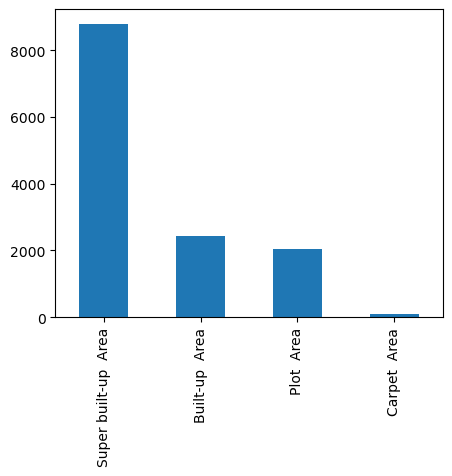

In [122]:
plt.figure(figsize=(5,4))
df.area_type.value_counts().plot(kind='bar')

In [11]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [12]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [13]:
#dropping the unnecessary features

df2 = df.drop(['area_type','availability','society','balcony'],axis =1)


OBSERVATION


By general observation we can conclude that area_type does not affect the price since the total_sqft is given.
Also society doest not matter since location is given.


In [15]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,$39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,$120.00
2,Uttarahalli,3 BHK,1440,2.0,$62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,$95.00
4,Kothanur,2 BHK,1200,2.0,$51.00


In [16]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [17]:
df2.dropna(inplace=True)

In [18]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [19]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,$39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,$120.00
2,Uttarahalli,3 BHK,1440,2.0,$62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,$95.00
4,Kothanur,2 BHK,1200,2.0,$51.00


#  Data cleaning process-feature Engineering


In [21]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [22]:
df2['bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0]))

In [23]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,$39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,$120.00,4
2,Uttarahalli,3 BHK,1440,2.0,$62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,$95.00,3
4,Kothanur,2 BHK,1200,2.0,$51.00,2


In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  object 
 5   bhk         13246 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 724.4+ KB


In [25]:
#total square feature

df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [26]:
#converting the values to float, avg value for the ranges.

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True



In [27]:
df3=df2.copy()
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,$39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,$120.00,4
2,Uttarahalli,3 BHK,1440,2.0,$62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,$95.00,3
4,Kothanur,2 BHK,1200,2.0,$51.00,2


In [28]:
df3[~df3['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186,4
122,Hebbal,4 BHK,3067 - 8156,4.0,? 477.00,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,? 54.01,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,? 43.49,2
188,KR Puram,2 BHK,1015 - 1540,2.0,? 56.80,2


In [29]:
import re
def sqft_to_num(x):
    sqft=x.split('-')
    if len(sqft)==2:
        return (float(sqft[0])+float(sqft[1]))/2
#     elif len(sqft)==1:
#         if 'Sq. Meter' in sqft[0]:
#             sqft[0] = re.sub(r'\D+.\D+', '',sqft[0])
#             return (float(sqft[0])*10.7639)
#         elif 'Perch' in sqft[0]:
#             sqft[0] = re.sub(r'\D+.\D+', '',sqft[0])
#             return (float(sqft[0])*272.25)
#         elif 'Sq. Yards' in sqft[0]:
#             sqft[0] = re.sub(r'\D+.\D+', '',sqft[0])
#             return (float(sqft[0])*9)
#         elif 'Acres' in sqft[0]:
#             sqft[0] = re.sub(r'\D+.\D+', '',sqft[0])
#             return (float(sqft[0])*43560)
#         elif 'Cents' in sqft[0]:
#             sqft[0] = re.sub(r'\D+.\D+', '',sqft[0])
#             return (float(sqft[0])*435.5)
#         elif 'Guntha' in sqft[0]:
#             sqft[0] = re.sub(r'\D+.\D+', '',sqft[0])
#             return (float(sqft[0])*1089)
#         elif 'Grounds' in sqft[0]:
#             sqft[0] = re.sub(r'\D+.\D+', '',sqft[0])
#             return (float(sqft[0])*2400)
#         else:
#             return float(sqft[0])
#     else:
#         return None
        
    try:
        return float(x)
    except:
        return None

In [30]:
df3['total_sqft']=df3['total_sqft'].apply(sqft_to_num)

In [31]:
df3=df3[df3.total_sqft.notnull()]

In [32]:
#cleanning the price feature

In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13200 non-null  object 
 1   size        13200 non-null  object 
 2   total_sqft  13200 non-null  float64
 3   bath        13200 non-null  float64
 4   price       13200 non-null  object 
 5   bhk         13200 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 721.9+ KB


In [34]:
df3['price'].unique()

array([' $39.07 ', ' $120.00 ', ' $62.00 ', ..., '40.14', '231', '488'],
      dtype=object)

Converting th price feature to numeric

In [35]:
import re

def clean_price(price):
    price= re.sub(r'[^\d.]','',price)
    if '-' in price:
        range_value = price.split('-')
        price = (float(range_value[0])+ float(range_value[1]))/2
    return float(price)

In [36]:
df3['price']=df3['price'].apply(clean_price)

In [37]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13200 non-null  object 
 1   size        13200 non-null  object 
 2   total_sqft  13200 non-null  float64
 3   bath        13200 non-null  float64
 4   price       13200 non-null  float64
 5   bhk         13200 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 721.9+ KB


In [40]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13200 non-null  object 
 1   size        13200 non-null  object 
 2   total_sqft  13200 non-null  float64
 3   bath        13200 non-null  float64
 4   price       13200 non-null  float64
 5   bhk         13200 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 721.9+ KB


In [41]:
df3['price_per_sqft']=df3['price']*100000/df3['total_sqft']

In [42]:
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


For the location feature

In [44]:
df3['location']=df3['location'].apply(lambda x: x.strip())

In [45]:
df3['location'].value_counts()

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [46]:
location_count = df3['location'].value_counts(ascending=False)
location_count

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [47]:
len(location_count[location_count>10])

240

In [48]:
len(location_count[location_count<=10])

1047

In [49]:
location_lessthan10=location_count[location_count<=10]
location_lessthan10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [50]:
len(df3.location.unique())

1287

In [51]:
df3['location']=df3['location'].apply(lambda x: 'others' if x in location_lessthan10 else x)
len(df3.location.unique())

241

## In this location column it has high unique values which is difficult to know every value and use it for prediction. Thus we check with location has maximum  repetition in our data. Any location with repetition less than 10 can be replaced as 'others'

In [53]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 825.0+ KB


In [54]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
total_sqft,13200.0,1555.302783,1237.323445,1.000000,1100.000000,1275.000000,1672.000000,52272.0
bath,13200.0,2.691136,1.338915,1.000000,2.000000,2.000000,3.000000,40.0
price,13200.0,141.769739,2202.520818,8.000000,50.000000,71.850000,120.000000,200250.0
bhk,13200.0,2.800833,1.292843,1.000000,2.000000,3.000000,3.000000,43.0
price_per_sqft,13200.0,9221.877417,147879.834719,267.829813,4267.701345,5438.331478,7317.073171,12000000.0



# considering the 1bhk minimum sqft required is 300sqft.by this will remove the data points considering less than 300sqft/bhk

In [56]:
df3[df3.total_sqft/df3.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,others,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,others,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [57]:
df3.shape

(13200, 7)

In [58]:
df3=df3[~(df3.total_sqft/df3.bhk<300)]
df3.shape

(12456, 7)

In [59]:
df3.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [60]:
df3.price_per_sqft.describe()

count    1.245600e+04
mean     7.687337e+03
std      1.054768e+05
min      2.678298e+02
25%      4.210526e+03
50%      5.294118e+03
75%      6.916749e+03
max      9.716157e+06
Name: price_per_sqft, dtype: float64

# Removing the outliers

In [62]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [63]:
df4= remove_pps_outliers(df3)
df4.shape

(10475, 7)

In [64]:
df4.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10475.000000,10475.000000,10475.000000,10475.000000,10475.000000
mean,1537.751067,2.500716,98.546620,2.594368,5902.843427
std,1134.786955,1.014349,113.174931,0.920014,2866.891957
min,300.000000,1.000000,10.000000,1.000000,267.829813
25%,1112.500000,2.000000,49.375000,2.000000,4258.586679
50%,1290.000000,2.000000,68.000000,2.000000,5208.333333
75%,1661.200000,3.000000,104.000000,3.000000,6538.629200
max,52272.000000,16.000000,2340.000000,16.000000,26666.666667


After this process the pps values has decreased 

In [115]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (6,4)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()


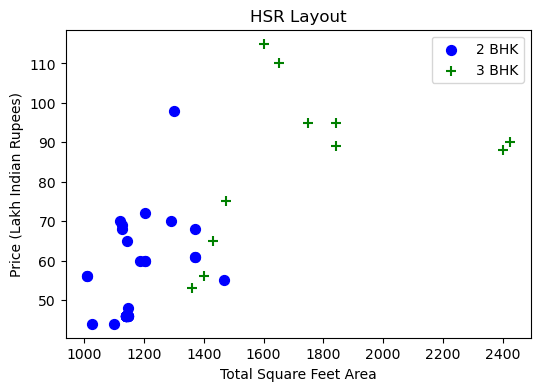

In [116]:
plot_scatter_chart(df4,'HSR Layout')

In [67]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [68]:
df5= remove_bhk_outliers(df4)
df5.shape

(7305, 7)

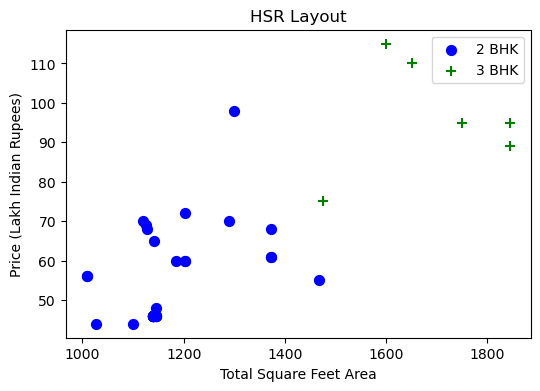

In [117]:
plot_scatter_chart(df5,'HSR Layout')

In [69]:
df5.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 14., 16., 13.])

Text(0, 0.5, 'Count')

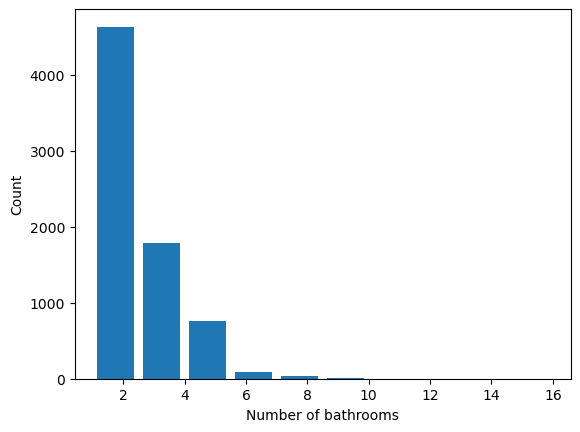

In [70]:
plt.hist(df5.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [71]:
df5[df5.bath>df5.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1638,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5250,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6734,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8175,others,9 Bedroom,3300.0,14.0,500.0,9,15151.515152


In [72]:
df6=df5[df5.bath<df5.bath+2]
df6.shape

(7305, 7)

In [ ]:
plt.hist(df6.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [73]:
df7=df6.drop(['size','price_per_sqft'],axis=1)
df7.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [74]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7305 entries, 0 to 10474
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7305 non-null   object 
 1   total_sqft  7305 non-null   float64
 2   bath        7305 non-null   float64
 3   price       7305 non-null   float64
 4   bhk         7305 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 342.4+ KB


# One Hot Encoding for the location feature

In [76]:
ohe = pd.get_dummies(df7.location)
ohe.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
df8 = pd.concat([df7,ohe.drop('others',axis=1)],axis='columns')
df8

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10466,others,2000.0,2.0,360.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10467,others,1140.0,1.0,185.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10470,others,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10471,others,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
df9 = df8.drop('location',axis=1)
df9.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
df9.shape

(7305, 244)

# Building the model

In [81]:
x=df9.drop(['price'],axis=1)
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
x.shape

(7305, 243)

In [83]:
y = df9.price
y.head(2)

0    428.0
1    194.0
Name: price, dtype: float64

In [84]:
y.shape

(7305,)

In [85]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=10)

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [87]:
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()

In [88]:
# X_train=ss.fit_transform(X_train)
# x_test= ss.transform(x_test)

# Instantiating the model

In [89]:
lr=LinearRegression()

In [90]:
def rmse(y_test,y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

In [91]:
lr.fit(X_train,y_train)
lr_score = lr.score(x_test,y_test)
lr_rmse = rmse(y_test,lr.predict(x_test))
print(lr_score,lr_rmse)

0.7621411442489741 55.25527739657219


# Using K fold cross validation to check the accuracy of the linear reg model

In [93]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.74732887, 0.79720982, 0.75334384, 0.73739621, 0.76459975])

In [95]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt_score = dt.score(x_test,y_test)
dt_rmse = rmse(y_test,dt.predict(x_test))

print(dt_score,dt_rmse)

0.5951155856081995 72.090764408216


In [97]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_score = rf.score(x_test,y_test)
rf_rmse = rmse(y_test,rf.predict(x_test))
print(rf_score, rf_rmse)

0.7190699287028683 60.05002818391952


In [98]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [50,100,150],
                'max_depth': [None,10,20,30]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.759976,{'normalize': False}
1,random_forest,0.691073,"{'max_depth': 20, 'n_estimators': 150}"
2,decision_tree,0.535942,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [99]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    X = np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    if loc_index >= 0:
        X[loc_index] = 1

    return lr.predict([X])[0]

In [100]:

predict_price('1st Phase JP Nagar',1000, 2, 2)

72.30544855279044

In [101]:
predict_price('Uttarahalli',1400, 2, 3)

65.84046272549585

In [102]:
predict_price('Gottigere',1100, 2, 2)

38.77668135407956